# Convolutional Neural Networks with Keras and TensorFlow Exercise (5 points)

This exercise is designed for students with beginner and intermediate skills in neural networks. If you have advanced skills in neural networks, please attempt the other exercise found in this folder. It is up to the students to evaluate whether their skills in working with neural networks are at the beginner, intermediate, or advanced level. 

## 1. Load the Dataset

For this exercise, we will use the Fashion MNIST dataset, which consists of 60,000 train and 10,000 test images of fashion items. 

More information about the dataset can be found [here](https://keras.io/api/datasets/fashion_mnist/).

First, import the necessary libraries (TensorFlow, Keras, NumPy, Matplotlib), and aferward load the Fashion MNIST dataset. The dataset can be loaded directly from the Keras built-in datasets.

In [1]:
# Your Code Here
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

Display the shape of the train and test arrays of images and labels. 

In [2]:
# Your Code Here
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Display the maximum and minimum values of the images. 

In [3]:
# Your Code Here
print("max: {}".format(np.max(train_x.flatten())))
print("min: {}".format(np.min(train_x.flatten())))

max: 255
min: 0


Resize the images to be in the [0,1] range, and display again the maximum and minimum values to make sure that the scaling was done properly.

In [4]:
# Your Code Here
train_x = train_x / 255.0
test_x = test_x / 255.0
print("max: {}".format(np.max(train_x.flatten())))
print("min: {}".format(np.min(train_x.flatten())))

max: 1.0
min: 0.0


Convert the train and test label arrays into one-hot encoding format.

In [7]:
# Your Code Here
train_label_onehot = keras.utils.to_categorical(train_y, 10)
test_label_onehot = keras.utils.to_categorical(test_y, 10)
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Display several images in the training dataset **and their labels**. 

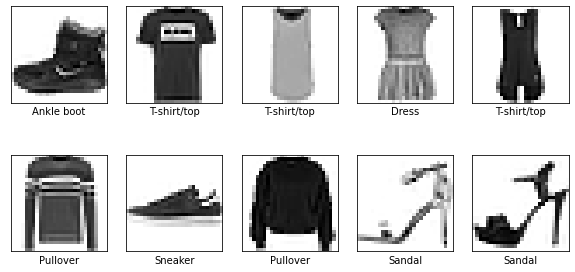

In [6]:
# Your Code Here
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])
plt.show()

## 2. Model Definition and Training

Create a model called `fminst_1` which has the following layers:
- Input layer
- Convolutional layer with 128 filters and kernel size of 3
- Convolutional layer with 128 filters and kernel size of 3
- Max-pooling layer 
- Flatten layer
- Dense layer with 64 neurons
- Output dense layer with 10 neurons

In [7]:
# Your Code Here
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

Display a summary of the model. State how many parameters the model has.

In [8]:
# Your Code Here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

Reshape the train arrays of images from the current shape of (60000, 28, 28) to (60000, 28, 28, 1).
Repeat the same for the test array of images.

In [56]:
# Your Code Here
train_x = tf.expand_dims(train_x, -1)
test_x = tf.expand_dims(test_x, -1)
train_x.shape

TensorShape([60000, 28, 28, 1])

Compile the model using Adam optimizer, and train the model for 10 epochs using a batch size of 128 images.

In [10]:
# Your Code Here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_x, train_y, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 12ms/step - loss: 0.4255 - accuracy: 0.8488
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2611 - accuracy: 0.9062
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.2082 - accuracy: 0.9232
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1707 - accuracy: 0.9377
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1405 - accuracy: 0.9483
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1125 - accuracy: 0.9590
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0906 - accuracy: 0.9667
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0686 - accuracy: 0.9747
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0549 - accuracy: 0.9799
Epoch 10/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0457 - accura

Calculate the accuracy of the model on the test dataset.

In [11]:
# Your Code Here
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
test_acc

313/313 - 1s - loss: 0.3292 - accuracy: 0.9247 - 1s/epoch - 3ms/step


0.9247000217437744

Plot a few images in the test dataset and display the ground-truth and predicted labels. 

313/313 [==============================] - 0s 1ms/step


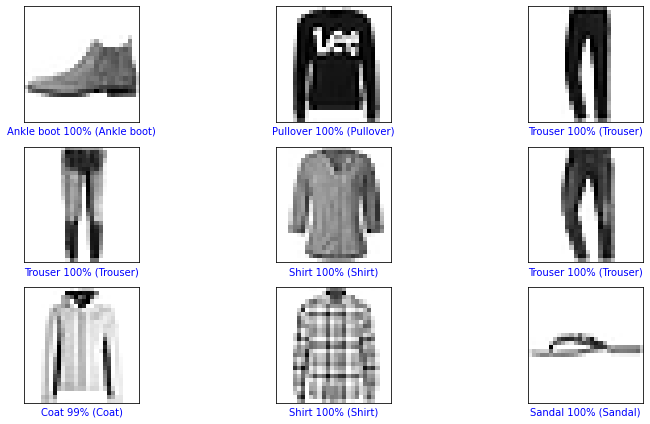

In [12]:
# Your Code Here
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_x)
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


plt.figure(figsize=(12, 6))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plot_image(i, predictions[i], test_y, test_x)
plt.tight_layout()
plt.show()

## 3. Define a Larger Model and Use Validation Split

Create a model called `fmnist_2` which has 3 blocks of Conv-Conv-MaxPooling layers with 64-128-256 filters per block, followed by a classifier with a Flatten layer and a sequence of Dense layers with 100, 50, and 10 neurons. 

In [13]:
# Your Code Here
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100))
model2.add(keras.layers.Dense(50, activation='relu'))
model2.add(keras.layers.Dense(10))

Compile and train the model for 10 epochs with a batch size of 128. Use 25% of the training data for validation. 

In [14]:
# Your Code Here
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.fit(train_x, train_y, epochs=10, batch_size=128, validation_data=(train_x, train_y), validation_split=0.25)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.6235 - accuracy: 0.7737 - val_loss: 0.4827 - val_accuracy: 0.8245
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3932 - accuracy: 0.8566 - val_loss: 0.4004 - val_accuracy: 0.8513
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3349 - accuracy: 0.8759 - val_loss: 0.3556 - val_accuracy: 0.8682
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2956 - accuracy: 0.8905 - val_loss: 0.3233 - val_accuracy: 0.8838
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2673 - accuracy: 0.9012 - val_loss: 0.3133 - val_accuracy: 0.8841
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2421 - accuracy: 0.9101 - val_loss: 0.3403 - val_accuracy: 0.8794
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2186 - accuracy: 0.9196 - val_loss: 0.2903 - val_accuracy: 0.9007
Epoch 

Calculate the accuracy on the test dataset. 

Discuss whether the model overfits the training data.

In [15]:
# Your Code Here
test_loss, test_acc = model2.evaluate(test_x,  test_y, verbose=2)
test_acc

313/313 - 1s - loss: 0.3306 - accuracy: 0.8920 - 590ms/epoch - 2ms/step


0.8920000195503235

## 4. Apply Dropout, Early Stopping

Create a model `fmnist_3` which uses a similar network from the previous section but it has a block of layers with 32-64-128 convolutional filters, and add at least 4 Dropout layers in the model. Select a dropout rate of 10% of the neurons. 

In [24]:
# Your Code Here
model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(keras.layers.MaxPooling2D((2, 2)))
model3.add(keras.layers.Dropout(0.1))
model3.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(keras.layers.MaxPooling2D((2, 2)))
model3.add(keras.layers.Dropout(0.1))
model3.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(keras.layers.MaxPooling2D((2, 2)))
model3.add(keras.layers.Dropout(0.1))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(100))
model3.add(keras.layers.Dense(50, activation='relu'))
model3.add(keras.layers.Dropout(0.1))
model3.add(keras.layers.Dense(10))

Train the model, and apply an Early Stopping callback, so that the training stops automatically with a patience of 5 epochs. 

Measure the time for training the model.

In [25]:
# Your Code Here
import time
start = time.time()
# your code

earlystop_callback = keras.callbacks.EarlyStopping(
  monitor='val_accuracy', 
  patience=5)
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model3.fit(train_x, train_y, epochs=10, callbacks=[earlystop_callback], batch_size=128, validation_data=(train_x, train_y), validation_split=0.25)
time_used = time.time()-start
time_used

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.7525 - accuracy: 0.7206 - val_loss: 0.4945 - val_accuracy: 0.8157
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4786 - accuracy: 0.8242 - val_loss: 0.3920 - val_accuracy: 0.8548
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4083 - accuracy: 0.8501 - val_loss: 0.3412 - val_accuracy: 0.8724
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3690 - accuracy: 0.8651 - val_loss: 0.3314 - val_accuracy: 0.8789
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3409 - accuracy: 0.8757 - val_loss: 0.2821 - val_accuracy: 0.8948
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3267 - accuracy: 0.8792 - val_loss: 0.2674 - val_accuracy: 0.9003
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3037 - accuracy: 0.8879 - val_loss: 0.2595 - val_accuracy: 0.9044
Epoch 

31.2260262966156

Plot the accuracy and loss curves.

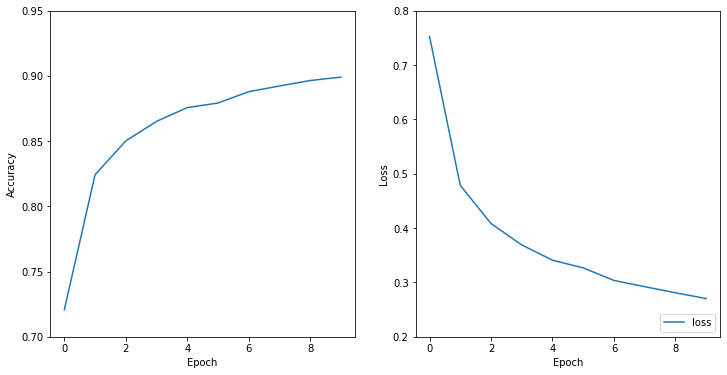

In [37]:
# Your Code Here
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.95])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.2, 0.8])
plt.legend(loc='lower right')
plt.show()

Calculate the accuracy on the test dataset.

In [39]:
# Your Code Here
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
test_acc

313/313 - 1s - loss: 0.3292 - accuracy: 0.9247 - 1000ms/epoch - 3ms/step


0.9247000217437744

## 5. Batch Normalization, and Data Augmentation

Create a model `fmnist_4` which applies a batch normalization layer to each convolutional block of layers in the model from the previous section. 

In [40]:
# Your Code Here
model4 = keras.models.Sequential()
model4.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D((2, 2)))
model4.add(keras.layers.Dropout(0.1))
model4.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D((2, 2)))
model4.add(keras.layers.Dropout(0.1))
model4.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D((2, 2)))
model4.add(keras.layers.Dropout(0.1))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(100))
model4.add(keras.layers.Dense(50, activation='relu'))
model4.add(keras.layers.Dropout(0.1))
model4.add(keras.layers.Dense(10))

Apply data augmentation, by adding width shift, height shift, horizontal and vertical flip, zoom, shear, and rotation. Select the values for the augmentation parameters as you wish. 

In [74]:
# Your Code Here
data_augmentation = keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])

Use the `train_test_split` function to create a validation dataset that contains 20% of the training dataset. 

In [64]:
# Your Code Here
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    train_x, train_y,  
    test_size=0.2
) 

(12000, 28, 28, 1)

Train the model using Early Stopping and show the training time.

In [65]:
# Your Code Here
import time
start = time.time()
# your code

earlystop_callback = keras.callbacks.EarlyStopping(
  monitor='val_accuracy', 
  patience=5)
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model4.fit(train_x, train_y, callbacks=[earlystop_callback], epochs=10, batch_size=128, validation_data=(valid_x, valid_y))
time_used = time.time()-start
time_used

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.5940 - accuracy: 0.7879 - val_loss: 1.5283 - val_accuracy: 0.4055
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4078 - accuracy: 0.8497 - val_loss: 0.3803 - val_accuracy: 0.8561
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3575 - accuracy: 0.8677 - val_loss: 0.3365 - val_accuracy: 0.8793
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3270 - accuracy: 0.8772 - val_loss: 0.3748 - val_accuracy: 0.8633
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3047 - accuracy: 0.8867 - val_loss: 0.3160 - val_accuracy: 0.8886
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2874 - accuracy: 0.8922 - val_loss: 0.3128 - val_accuracy: 0.8899
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2749 - accuracy: 0.8968 - val_loss: 0.2943 - val_accuracy: 0.8973
Epoch 

19.61791181564331

Plot the accuracy and loss curves.

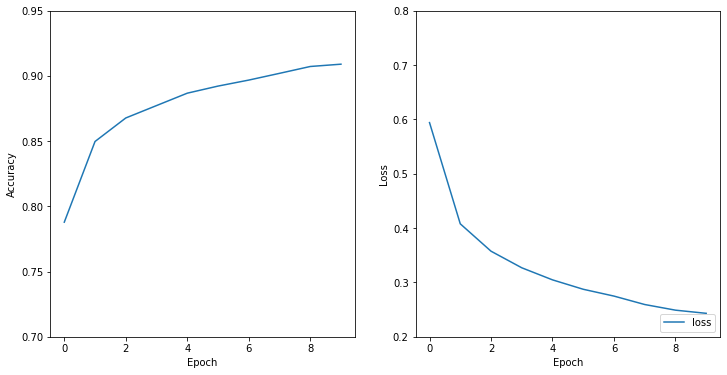

In [66]:
# Your Code Here
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.95])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.2, 0.8])
plt.legend(loc='lower right')
plt.show()

Calculate the accuracy on the test dataset.

In [68]:
# Your Code Here
test_loss, test_acc = model4.evaluate(test_x,  test_y, verbose=2)
test_acc

313/313 - 1s - loss: 0.3224 - accuracy: 0.8870 - 974ms/epoch - 3ms/step


0.8870000243186951

## 6. Saving and Loading the Model

Save the latest model.

In [71]:
# Your Code Here
model4.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model\assets


INFO:tensorflow:Assets written to: ./my_model\assets


Load the saved model and check if the accuracy on the test set matches the one calculated previously. 

In [72]:
# Your Code Here
new_model = keras.models.load_model('./my_model')
loss, acc = new_model.evaluate(test_x, test_y, verbose=2)
acc

313/313 - 1s - loss: 0.3224 - accuracy: 0.8870 - 780ms/epoch - 2ms/step


0.8870000243186951

What is the total number of parameters of this model? (Hint: use summary).

In [73]:
# Your Code Here
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)      